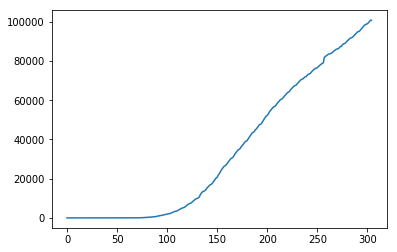

In [179]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 23 15:57:10 2020

@author: usuario
"""
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from numpy import poly1d,polyfit  
from sklearn.model_selection import train_test_split
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import math
import statistics
from scipy.integrate import odeint
from random import randrange # Obtener un numero randomico
import pygame
#cargamos nuestro set de datos
data = pd.read_csv('time-series-19-covid-combined_csv.csv')
data = data[data['Country/Region'].isin(['Mexico'])]
#y = list(df.iloc [:, 1]) # Numero de casos
#obtenemos datos de los casos confirmados
infectados = list(data.iloc[:, 5])
formatoFecha = '%Y-%m-%d'
fecha = data['Date']
data['Date'] = fecha.map(lambda x: (datetime.strptime(x, formatoFecha) - datetime.strptime('2020-01-22', formatoFecha)).days)
dias = list(data['Date'])
plt.plot(dias, infectados)


[92880.30485378] Dia:  1
[93262.64356316] Dia:  2
[93644.98227255] Dia:  3
[94027.32098194] Dia:  4
[94409.65969132] Dia:  5
[94791.99840071] Dia:  6
[95174.3371101] Dia:  7


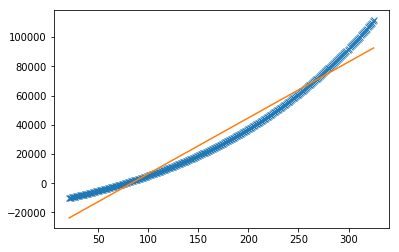

In [186]:
#regresion lineal
lineal = linear_model.LinearRegression()
lineal.fit(np.array(x).reshape(-1,1), y)
plt.plot(x, y, 'x')
plt.plot(x, lineal.predict(np.array(x).reshape(-1, 1)))

j = 1
for i in range(326, 333):
    ##PREDICCION PARA 7 DIAS SIGUIENTES
    prediccion = lineal.predict([[i]])
    print(prediccion, 'Dia: ',j)
    j += 1
    

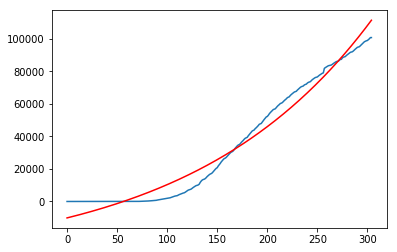

In [181]:
#regresion exponencial
def reg_exponencial(x, c0, c1, c2, c3):
    return c0 * np.exp(-c1 * x) + c2 + c3
g = [100, 0.01, 200, 0.01]
n = len(dias)
y = np.empty(n)
for i in range(n):
    y[i] = reg_exponencial(dias[i], g[0], g[1], g[2], g[3])
popt, pcov = curve_fit(reg_exponencial, dias, infectados, g)
for i in range(n):
    y[i] = reg_exponencial(dias[i], popt[0], popt[1], popt[2], popt[3])
plt.plot(dias, infectados)
plt.plot(dias, y, 'r')

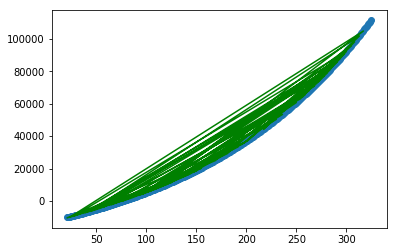

In [184]:
#regresion polinomial
plt.plot(x, y, 'o')
p = poly1d(polyfit(x, y, deg=4))
Xtrain, Xtest, y_train, y_test = train_test_split(x, y, test_size=0.2)
#print(Xtrain, Xtest, y_train, y_test)
poli_reg = PolynomialFeatures(degree = 3)
X_train = poli_reg.fit_transform(np.array(Xtrain).reshape(-1,1))
X_test = poli_reg.fit_transform(np.array(Xtest).reshape(-1,1))
pr = linear_model.LinearRegression()
pr.fit(X_train, y_train)
Y_pred_pr = pr.predict(X_test)
#plt.plot(Xtest, y_test)
plt.plot(Xtest, Y_pred_pr, color='green')